<a href="https://colab.research.google.com/github/thecrazyphysicist369/Voting-in-a-Small-World-Network/blob/master/Log_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logarithmic fucntion for voting

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random


#vertex generator generates each voter with their properties
def gen_vertex(n):
    ver_list=[]
    c=0

    for i in range(n):
        vertex = {'index': c, 			#the unique index of the voter 
                  'endurance': random.randrange(-100, 100), #the enduaring power of the voter
                  'influence': random.randint(10, 50), #the influencing power of the voter
                  'connected': [], #the small world connections between the voters
                  }
        ver_list.append(vertex)
        c+=1
    return ver_list

def gen_graph(n, k, p):
   verlist = gen_vertex(n)
   #n = a + b
   G = nx.watts_strogatz_graph(n, k, p, seed=10)
   neighbor = []
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))
   	neighbor.append(neighbours)
   for i in range(n):
   	verlist[i]['connected']=neighbor[i]
   #print(conlist)
   return verlist

In [ ]:
#This is the logarithmic voting function for the small world network.
import math as m
import random
def log_campaining(voters):
    list_pos = [] #list for party A
    list_neg = [] #list for party B
    list_neu = [] #list for neutral Party
    pos = 0
    neg = 0
    neu = 0
    for influencer in voters:
        friends = influencer['connected']
        #print(friends)
        for j in friends:
            v_en=float(voters[j]['endurance'])
            in_en=float(influencer['endurance'])
            in_in=float(influencer['influence'])
	        
            if v_en>0 and in_en>0:
		    #if the voter and influencer belongs to the same party A
                voters[j]['endurance'] = v_en + m.log2(abs(v_en)**in_in)
            elif v_en<0 and in_en<0:
	    	#if the voter and influencer belongs to the same party B
                voters[j]['endurance'] = v_en + m.log2(abs(v_en)**-in_in)
            elif v_en >0 and in_en<0:
	    	#if voter belongs to A and influencer in B
               	voters[j]['endurance'] = v_en + m.log2(abs(v_en)**-in_in)
            elif v_en<0 and in_en>0:
	    	#if voter belongs to B and influencer in A
               	voters[j]['endurance'] = v_en + m.log2(abs(v_en)**in_in)
            elif v_en==0 and in_en>0:
                v_en += 1
                voters[j]['endurance'] = m.log2(abs(v_en)**in_in)
            elif v_en==0 and in_en<0:			
                v_en += 1
                voters[j]['endurance'] = m.log2(abs(v_en)**-in_in)
        #    print(j, voters[j]['endurance'])
        #print('\n')
        pos = 0
        neg = 0
        neu = 0
        for j in range(len(voters)):
            if float(voters[j]['endurance'])>0:
                pos += 1
            elif float(voters[j]['endurance'])<0:
                neg += 1
            else:
                neu += 1
        list_pos.append(pos)
        list_neg.append(neg)
        list_neu.append(neu)

    return (voters, list_pos,
            list_neg,
            list_neu)

Please input the number of voters you want to analyze : 10000

Input the k nearest neighbors : 10
enter the probablity of the node connection : 0.1
please enter the number of iterations you want the campaining to run : 100
Doing Logarithmic Voting


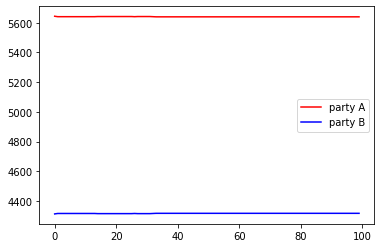

In [ ]:
number_of_voters = int(input("Please input the number of voters you want to analyze : "))

k = int(input("\nInput the k nearest neighbors : "))

p = float(input("enter the probablity of the node connection : "))

iterations = int(input("please enter the number of iterations you want the campaining to run : "))
number=[]
for i in range(number_of_voters):
    number.append(i)

#Generating the small world network
voters_p = gen_graph(number_of_voters, k, p)

posi = []
negi = [] 
neut = []
count = []

  #The voting takes place as many times the iteration is chosen
print ("Doing Logarithmic Voting")

for j in range (iterations):
	voters_p,pos,neg,neu=log_campaining(voters_p)
	posi.append(pos[number_of_voters-1]) #Keeps track of party A
	#print(pos[number_of_voters-1])
	negi.append(neg[number_of_voters-1]) #Keeps track of party B
	#print(neg[number_of_voters-1])
	neut.append(neu[number_of_voters-1]) #Keeps track of Neutral
	count.append(j)
	#print_each_iter(number,	pos, neg)
    


plt.plot(count, posi, color='r', label = "party A")
plt.plot(count, negi, color='b', label = "party B")
#plt.plot(count, neut, color='g', label = "Neutral")
plt.legend()
plt.show()